# Full Inference Analysis

Note that the interactive plots require the jupyter widgets extension for jupyter lab to be installed. This can currently not be managed in a conda env but can be installed using  
`jupyter labextension install @jupyter-widgets/jupyterlab-manager`

Call `help(hm.chart_name)` for information on arguments etc. for each charting function.

## Usage

- Duplicate this notebook
- Run to compare changes
- Delete all unaffected comparisons
- Write conclusions

In [1]:
import sys
import os
home = os.path.expanduser('~')
sys.path.append(home + '/mc/witan.send.analysis/inference_analysis/')

import heatmaps as hm
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
import seaborn as sns
from os import path

%matplotlib inline

In [2]:
base_dir = home + "/mc/witan.send/data/demo/"

data_dir = base_dir + "data/"
transitions_csv = data_dir + "/transitions.csv"

results_dir = base_dir + "results/" 
results_for_checking_dir = base_dir + "results_for_checking/"

# Model Parameters

In [5]:
ipd.Code(filename=results_for_checking_dir + "runtime-metadata.edn",language='clojure')

{:execution
 {:start {:date "2019-03-15", :time "11:31:02"},
  :end {:date "2019-03-15", :time "11:32:05"}},
 :environment-metadata
 {:model-version "1.7.0",
  :os-name "Linux",
  :os-version "4.18.0-16-generic",
  :clj-version "1.9.0",
  :jvm-version "25.201-b09",
  :git-branch "tdf/joiner-unobserved-ay",
  :git-commit-id "8456d9e",
  :git-url
  "https://github.com/MastodonC/witan.send/commit/8456d9ecabdda451526807f585d0f8ca160adf55"},
 :file-inputs-md5s
 {:transitions "6b1468a38742f54ccb61bccf820dd5df",
  :population "f19179ab601db8325def8a5738d8fe71",
  :costs "396beeefe2c6eeb9aa31b7259bfaac65",
  :valid-states "7f63d89714fd9e6ac3dd71b118589c07"}}

In [6]:
ipd.Code(filename=results_dir + "runtime-metadata.edn",language='clojure')

FileNotFoundError: [Errno 2] No such file or directory: '/home/matt/mc/witan.send/data/demo/results/runtime-metadata.edn'

In [7]:
ipd.Code(filename=results_for_checking_dir + "runtime-config.edn",language='clojure')

{:file-inputs
 {:transitions "data/transitions.csv",
  :population "data/population.csv",
  :costs "data/costs.csv",
  :valid-states "data/valid-states.csv"},
 :scenario-parameters
 {:filter-transitions-from nil,
  :which-transitions? nil,
  :splice-ncy nil,
  :modify-transition-by nil,
  :modify-transitions-from nil},
 :projection-parameters {:random-seed 50, :simulations 10},
 :output-parameters
 {:run-outputs true,
  :run-charts true,
  :output-dir "results_for_checking",
  :settings-to-exclude-in-charts nil,
  :keep-temp-files? false,
  :use-confidence-bound-or-interval nil,
  :population-file "data/population.csv",
  :project-dir "data/demo"},
 :validation-parameters {:run-validation true, :keep-temp-files? false}}

In [8]:
ipd.Code(filename=results_dir + "runtime-config.edn",language='clojure')

FileNotFoundError: [Errno 2] No such file or directory: '/home/matt/mc/witan.send/data/demo/results/runtime-config.edn'

# Transitions

# Transitions

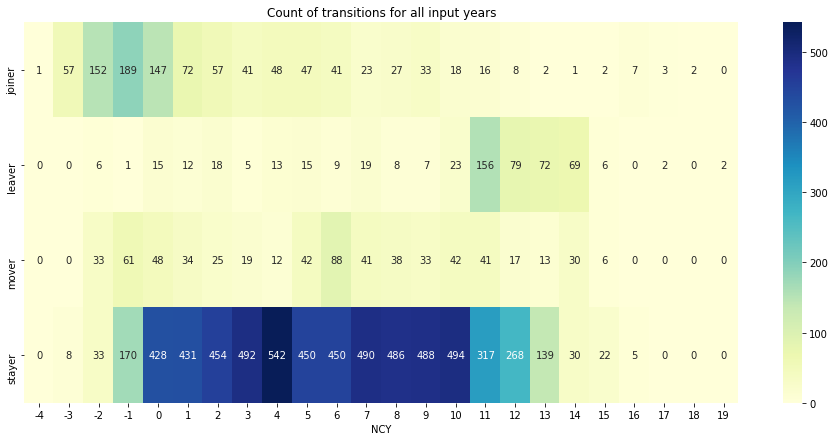

In [9]:
fig, ax = hm.transition_counts(transitions_csv)

# Joiners

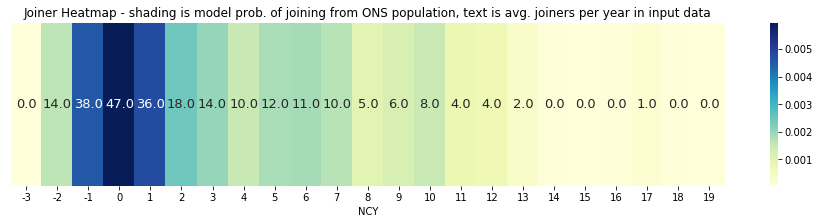

In [10]:
fig, ax = hm.joiner_beta(results_dir)

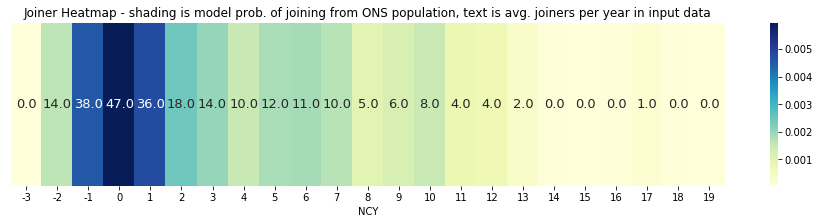

In [11]:
fig, ax = hm.joiner_beta(results_for_checking_dir)

In [12]:
hm.joiner_dirichlet(results_dir)

interactive(children=(Dropdown(description='ay', options=(-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…

In [13]:
hm.joiner_dirichlet(results_for_checking_dir)

interactive(children=(Dropdown(description='ay', options=(-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…

# Leavers

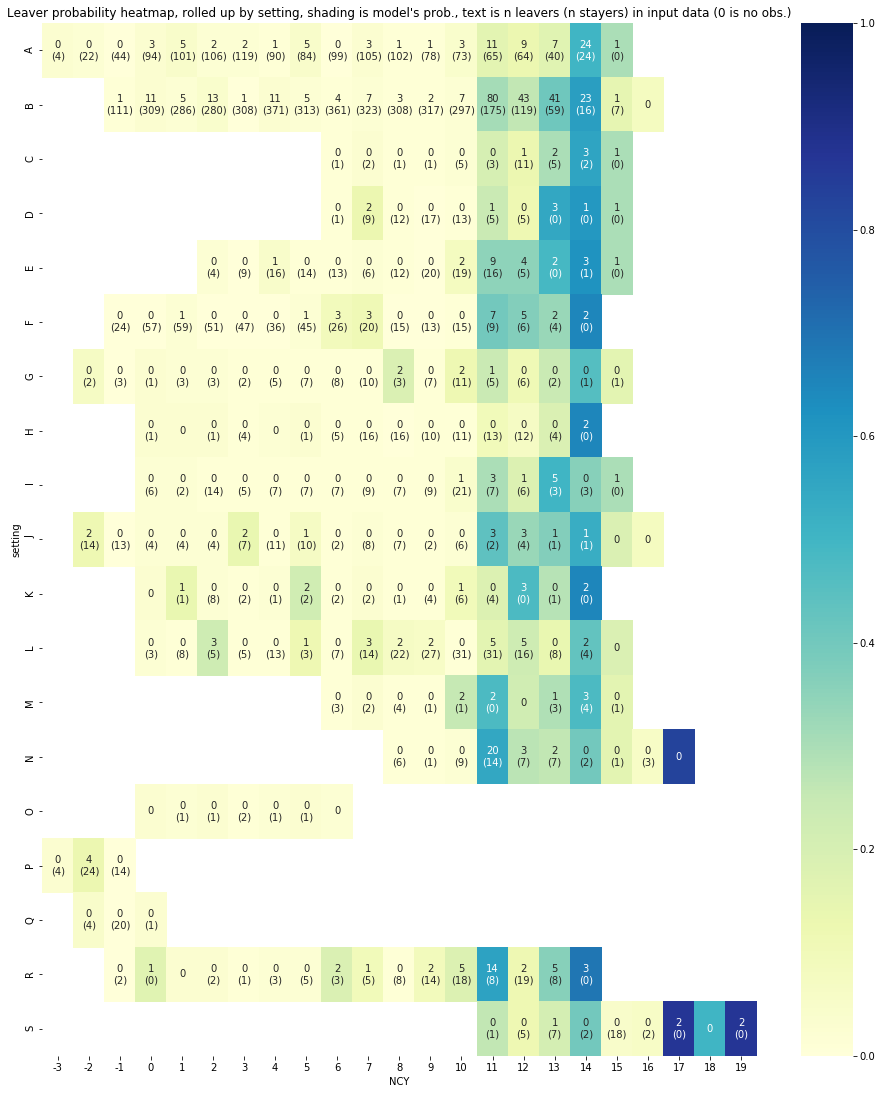

In [14]:
fig, ax = hm.leaver_beta(results_dir, rollup="setting")

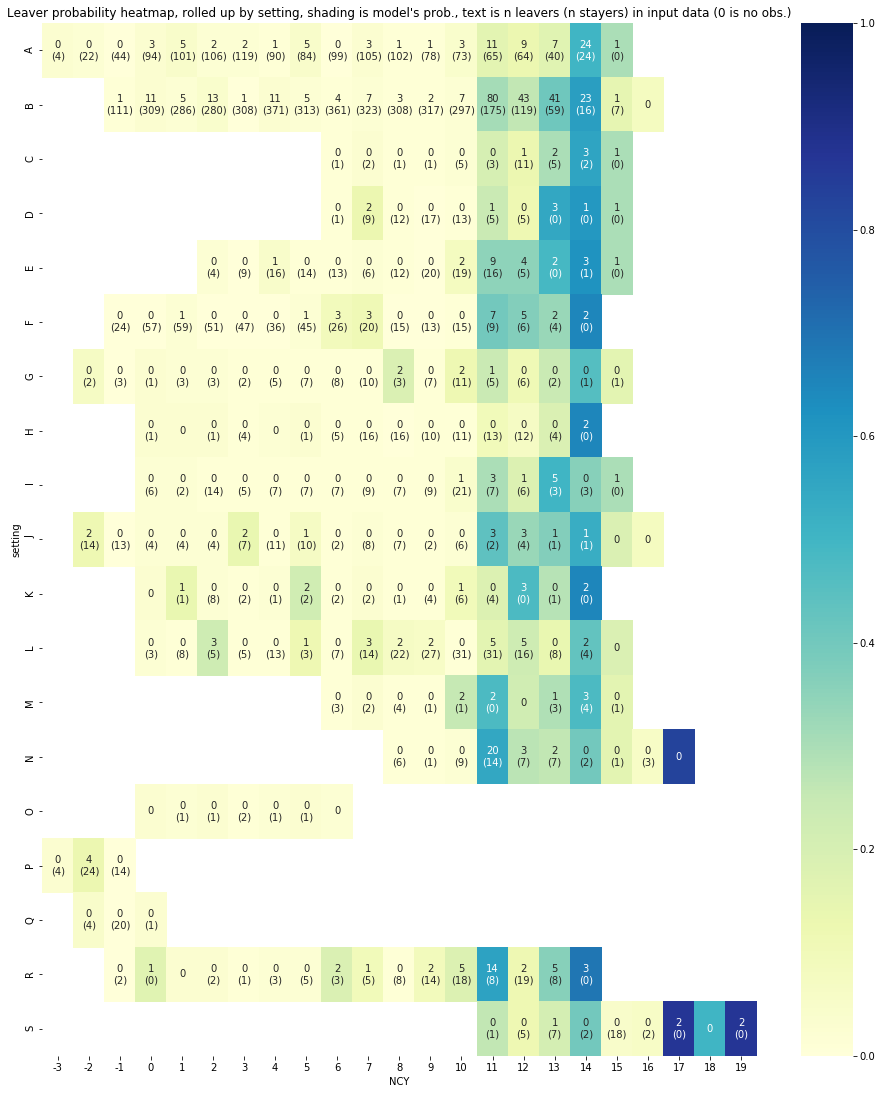

In [15]:
fig, ax = hm.leaver_beta(results_for_checking_dir, rollup="setting")

# Movers

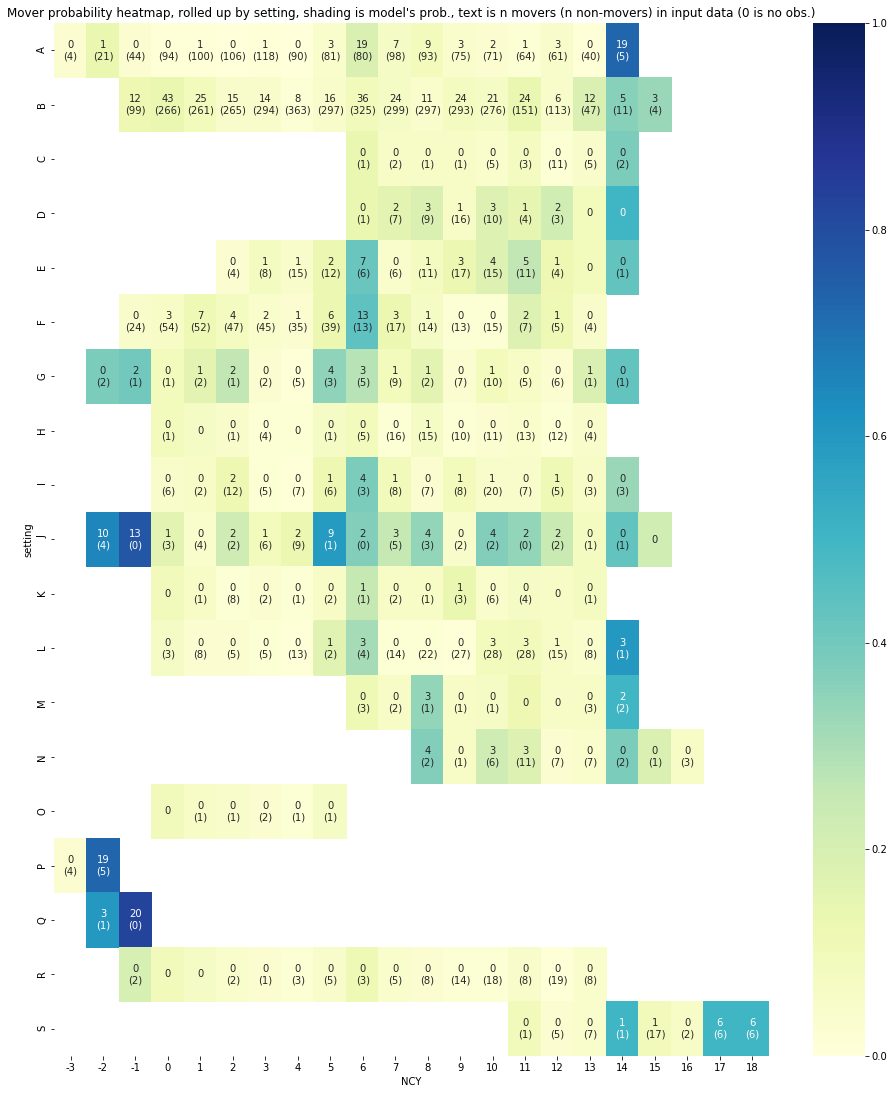

In [16]:
fig, ax = hm.mover_beta(results_dir, rollup="setting")

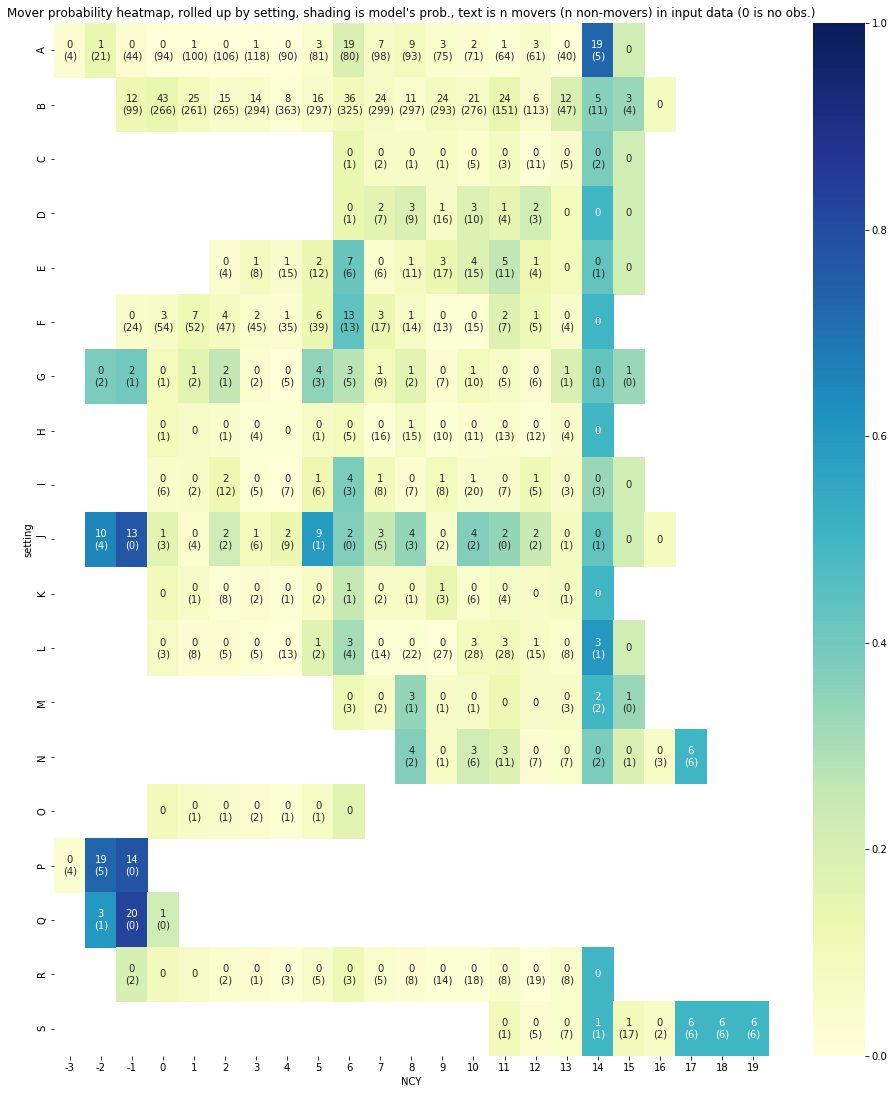

In [17]:
fig, ax = hm.mover_beta(results_for_checking_dir, rollup="setting")

In [3]:
hm.mover_dirichlet_v2(results_dir)

interactive(children=(Dropdown(description='need', options=('T', 'U', 'V', 'W', 'X', 'Y'), value='T'), Dropdow…

In [4]:
hm.mover_dirichlet(results_for_checking_dir)

interactive(children=(Dropdown(description='need', options=('T', 'U', 'V', 'W', 'X', 'Y'), value='T'), Dropdow…

In [23]:
di = pd.read_csv(path.join(results_for_checking_dir, "movers_dirichlet_expectations.csv"))
ay = 11
need = "T"
setting = "A"
d = di[(di['ay'] == ay) & (di.need == need)]
d = d[['setting', 'setting-destination', 'expectation']]
df_plot = d

df_plot = df_plot.pivot(index='setting',
                                columns='setting-destination',
                                values='expectation').dropna(axis=0, how='all')
df_plot
d.head()

,setting,setting-destination,expectation
11274,A,B,0.013699
11275,A,C,0.039384
11276,A,D,0.000856
11277,A,E,0.000856
11278,A,F,0.013699


In [29]:
di = pd.read_csv(path.join(results_dir, "movers_dirichlet_expectations.csv"))
ay = 11
need = "T"
setting = "A"
d = di[(di['ay'] == ay) & (di.need == need) & (di.setting == setting)]
d = d[['setting','need', 'setting-destination', 'need-destination', 'expectation']]
df_plot = d
d
df_plot = df_plot.pivot(index='need-destination',
                                columns='setting-destination',
                                values='expectation').dropna(axis=0, how='all')
df_plot
#d.head()

setting-destination,A,B,C,D,E,F,G,H,I,J,K,L,N,R,S
need-destination,,,,,,,,,,,,,,,
T,NaN,0.002072,0.006171,0.000023,0.000023,0.002072,0.000023,0.000023,0.000023,0.014368,0.502072,0.002072,0.00822,0.000023,0.041008
U,0.006171,0.002072,0.006171,0.000023,0.000023,0.002072,0.000023,0.000023,0.000023,0.014368,0.002072,0.002072,0.00822,0.000023,0.041008
V,0.006171,0.002072,0.006171,0.000023,0.000023,0.002072,0.000023,0.000023,0.000023,0.014368,0.002072,0.002072,0.00822,0.000023,0.041008
W,0.006171,0.002072,0.006171,0.000023,0.000023,0.002072,0.000023,0.000023,0.000023,0.014368,0.002072,0.002072,0.00822,0.000023,0.041008
X,0.006171,0.002072,0.006171,0.000023,0.000023,0.002072,0.000023,0.000023,0.000023,0.014368,0.002072,0.002072,0.00822,0.000023,0.041008
Y,0.006171,0.002072,0.006171,0.000023,0.000023,0.002072,0.000023,0.000023,0.000023,0.014368,0.002072,0.002072,0.00822,0.000023,0.041008


# Chart Comparison

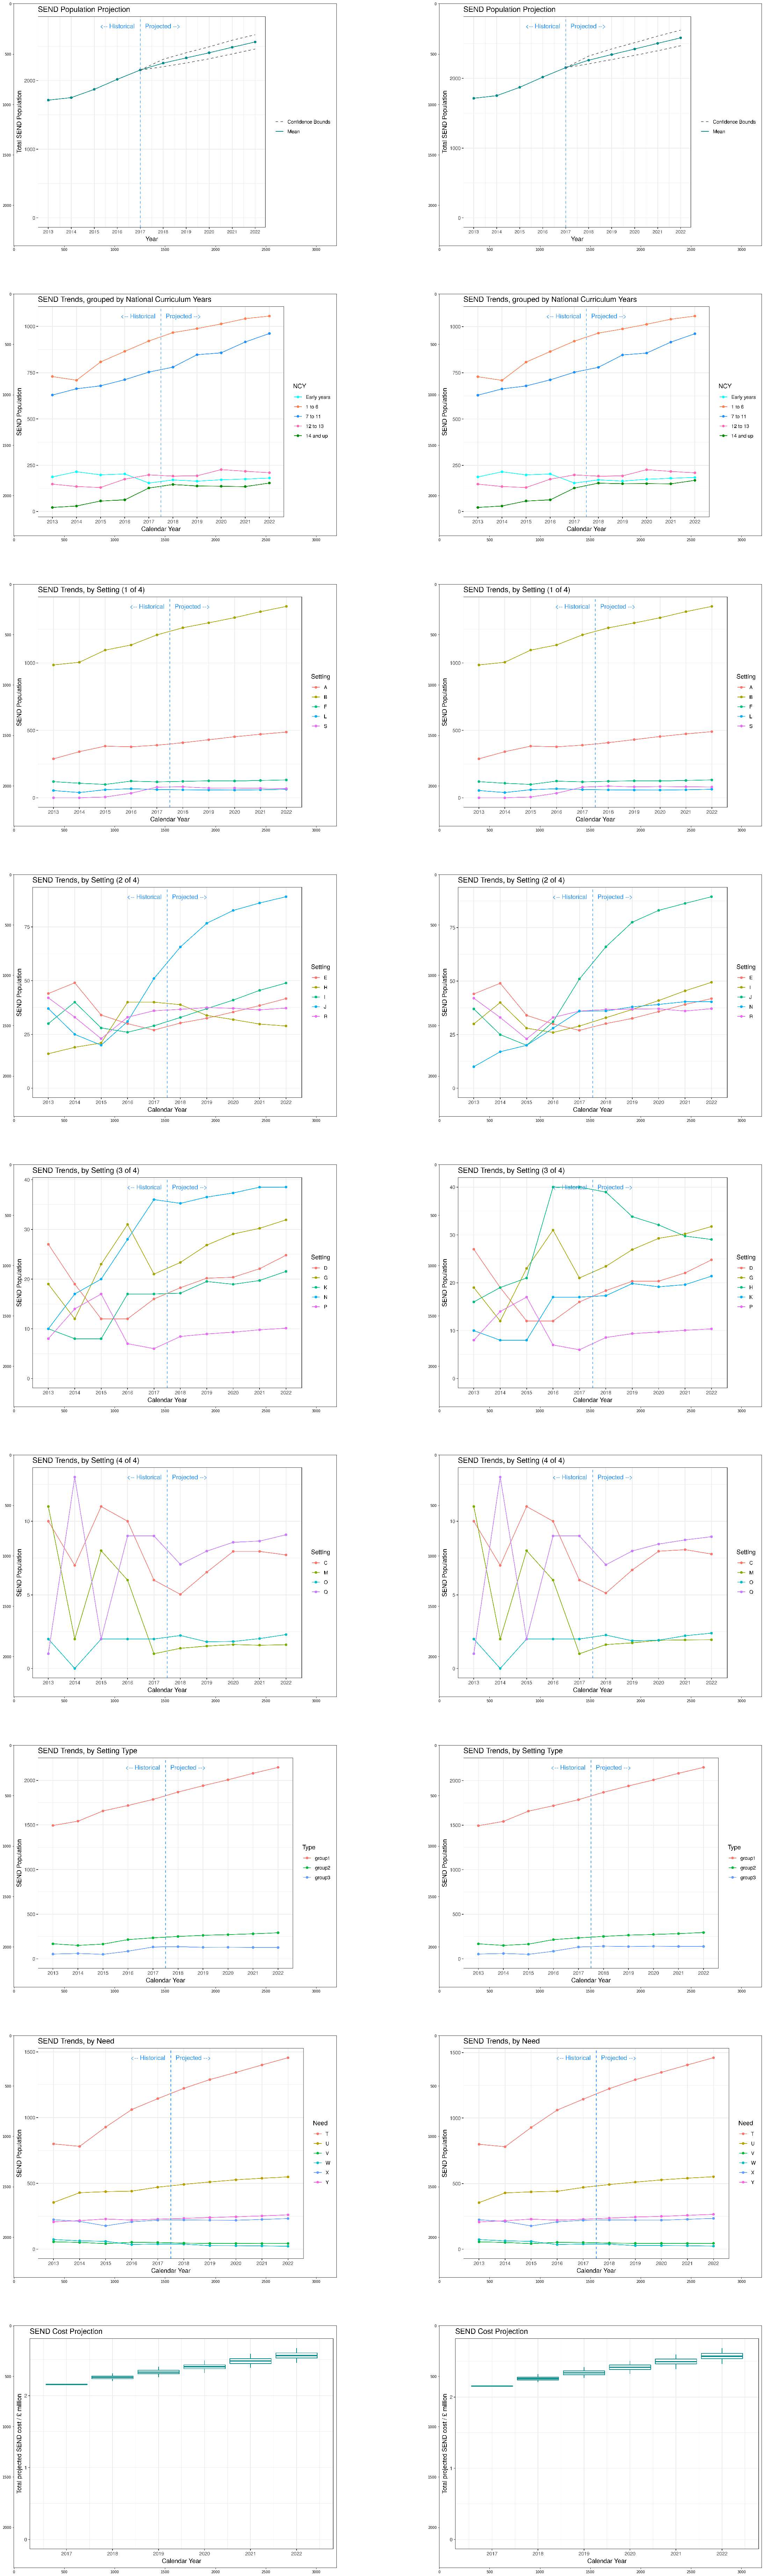

In [103]:
charts = ["Total_Population.png",
          "NCY_Population_Trends.png",
          "Settings_Trends_1.png",
          "Settings_Trends_2.png",
          "Settings_Trends_3.png",
          "Settings_Trends_4.png",
          "Setting_Type_Counts.png",
          "Need_Trends.png",
          "Total_Cost.png"]

fig, ax = plt.subplots(len(charts),2,figsize=(40, len(charts) * 15))

def imagerow(row, filename):
    ax[row,0].imshow(plt.imread(results_dir + filename))
    ax[row,1].imshow(plt.imread(results_for_checking_dir + filename))

for i, filename in enumerate(charts):
    imagerow(i, filename)
    

# Validation Comparison

Functions to work out validation differences

Quick note on validation:
 - three runs
 - 13/14 to predict 15,16,17 (n-transitions 1)
 - 13/14/15 to predict 16/17 (n-transitions 2)
 - 13/14/15/16 to predict 17 (n-transitions 3)
 
 

In [104]:
def analyse_validation(index_cols):
    def fn(path,title):
        df = pd.read_csv(path)
        df = df.set_index(index_cols)
        df = df[['ground-truth','mean']]
        df['diff'] = df['mean'] - df['ground-truth']
        df['fdiff'] = round(df['mean']/df['ground-truth'],3)
        df['fdiff'] = df['fdiff'].fillna(0)
        df.columns = pd.MultiIndex.from_product([[title],df.columns])
        return df
    return fn
    
analyse_count_validation = analyse_validation(['calendar-year', 'n-transition'])
analyse_state_validation = analyse_validation(['calendar-year', 'n-transitions', 'academic-year', 'need-setting'])

### Count Per Calendar Year Differences

In [105]:
results_count = analyse_count_validation(results_dir + "/validation_results_count.csv", "results")
results_for_checking_count = analyse_count_validation(results_for_checking_dir + "/validation_results_count.csv", "results_for_checking")
validation_count = pd.concat([results_for_checking_count, results_count], axis=1)
validation_count

results_for_checking                          \
                                   ground-truth     mean    diff  fdiff   
calendar-year n-transition                                                
2015          1                            1877  1847.08  -29.92  0.984   
2016          1                            2003  1906.32  -96.68  0.952   
2017          1                            2153  1995.16 -157.84  0.927   
2016          2                            2003  2009.93    6.93  1.003   
2017          2                            2153  2115.61  -37.39  0.983   
              3                            2153  2123.11  -29.89  0.986   

                                results                          
                           ground-truth     mean    diff  fdiff  
calendar-year n-transition                                       
2015          1                    1877  1847.08  -29.92  0.984  
2016          1                    2003  1906.32  -96.68  0.952  
2017          1                    2153  1995.16 -157.84  0.927  
2016          2                    2003  2008.80    5.80  1.003  
2017          2                    2153  2115.83  -37.17  0.983  
              3                    2153  2122.72  -30.28  0.986

Are all results below a perentage threshold difference?

In [106]:
pdiff_threshold = 0 # percentage difference between validation
validation_count[100 * (validation_count['results_for_checking','fdiff'] - validation_count['results','fdiff']).abs() > pdiff_threshold].empty

True

note: this may be a better check than the current md5sum based acceptance test in the model

### State Differences

In [107]:
results_state = analyse_state_validation(results_dir + "/validation_results_state.csv", "results")
results_for_checking_state = analyse_state_validation(results_for_checking_dir + "/validation_results_state.csv", "results_for_checking")
validation_state = pd.concat([results_for_checking_state, results_state], axis=1)
validation_state.head(10)

results_for_checking  \
                                                               ground-truth   
calendar-year n-transitions academic-year need-setting                        
2015          1             0             T-K                             0   
                            11            Y-F                             0   
                            4             V-H                             0   
                            8             Y-R                             0   
                            15            U-E                             0   
                            3             W-E                             0   
                            9             U-C                             0   
                            11            V-I                             1   
                            0             V-O                             0   
                            10            V-L                             0   

                                                                              \
                                                        mean  diff     fdiff   
calendar-year n-transitions academic-year need-setting                         
2015          1             0             T-K           1.36  1.36       inf   
                            11            Y-F           0.03  0.03       inf   
                            4             V-H           0.01  0.01       inf   
                            8             Y-R           0.02  0.02       inf   
                            15            U-E           0.00  0.00  0.000000   
                            3             W-E           0.01  0.01       inf   
                            9             U-C           0.01  0.01       inf   
                            11            V-I           1.86  0.86  1.860000   
                            0             V-O           0.01  0.01       inf   
                            10            V-L           0.02  0.02       inf   

                                                            results        \
                                                       ground-truth  mean   
calendar-year n-transitions academic-year need-setting                      
2015          1             0             T-K                     0  1.36   
                            11            Y-F                     0  0.03   
                            4             V-H                     0  0.01   
                            8             Y-R                     0  0.02   
                            15            U-E                     0  0.00   
                            3             W-E                     0  0.01   
                            9             U-C                     0  0.01   
                            11            V-I                     1  1.86   
                            0             V-O                     0  0.01   
                            10            V-L                     0  0.02   

                                                                        
                                                        diff     fdiff  
calendar-year n-transitions academic-year need-setting                  
2015          1             0             T-K           1.36       inf  
                            11            Y-F           0.03       inf  
                            4             V-H           0.01       inf  
                            8             Y-R           0.02       inf  
                            15            U-E           0.00  0.000000  
                            3             W-E           0.01       inf  
                            9             U-C           0.01       inf  
                            11            V-I           0.86  1.860000  
                            0             V-O           0.01       inf  
                            10            V-L           0.02       inf

In [108]:
pdiff_threshold = 0 # percentage difference between validation
diff_threshold = 0 # population difference between validation

percentage_mask = 100 * (validation_state['results_for_checking','fdiff'] - validation_state['results','fdiff']).abs() > pdiff_threshold
diff_mask = (validation_state['results_for_checking', 'diff'] - validation_state['results','diff']).abs() > diff_threshold
validation_state[percentage_mask & diff_mask].empty


False

#### Which States are >0 pop difference and > 0% different?

In [109]:
validation_state[percentage_mask & diff_mask]

results_for_checking  \
                                                               ground-truth   
calendar-year n-transitions academic-year need-setting                        
2016          2              0            T-K                             4   
                             11           Y-F                             5   
                             9            U-C                             0   
                             11           V-I                             0   
                             0            V-O                             0   
                             10           W-B                             3   
                             7            X-D                             3   
                             9            Y-L                             0   
                             11           T-A                             5   
                             6            W-E                             0   
                             0            T-L                             0   
                             4            Y-H                             0   
                             3            X-H                             0   
                             12           U-B                             7   
                             14           W-S                             2   
                             13           Y-L                             2   
                             2            T-J                             1   
                             6            T-C                             0   
                             10           Y-H                             0   
                             7            T-M                             0   
                             6            X-E                             2   
                             0            T-O                             0   
                            -1            Y-F                             2   
                             4            X-F                             0   
                             3            U-I                             4   
                             12           X-N                             7   
                             11           X-E                             3   
                             1            Y-B                            12   
                             14           X-N                             1   
                             8            X-M                             0   
...                                                                     ...   
2017          3              12           T-S                             3   
                             2            Y-A                             2   
                             12           V-S                             0   
                             8            T-B                            42   
                             9            U-H                             1   
                             14           U-G                             0   
                             1            W-I                             0   
                                          X-L                             0   
                             3            X-R                             0   
                             1            X-I                             0   
                             5            W-K                             0   
                             3            X-A                             3   
                             15           W-S                             1   
                             5            T-F                            10   
                             8            X-B                             6   
                             4            X-A                             3   
                            -1            U-A                             6   
                          

What percentage is the model better than or equal to the current results?

In [110]:
better_diff_mask = (validation_state['results_for_checking', 'diff'].abs() >= validation_state['results','diff'].abs())
100 * validation_state[better_diff_mask].shape[0] / validation_state.shape[0]


86.16803278688525

In [111]:
better_fdiff_mask = ((1 - validation_state['results_for_checking', 'fdiff']).abs() >= (1 - validation_state['results','fdiff']).abs())
100 * validation_state[better_fdiff_mask].shape[0] / validation_state.shape[0]

92.22449908925319

In [112]:
validation_state[~better_fdiff_mask]

results_for_checking  \
                                                               ground-truth   
calendar-year n-transitions academic-year need-setting                        
2016          2              0            T-K                             4   
                             11           V-I                             0   
                             0            V-O                             0   
                             7            X-D                             3   
                             0            T-L                             0   
                             3            X-H                             0   
                             12           U-B                             7   
                             14           W-S                             2   
                             0            T-O                             0   
                            -1            Y-F                             2   
                             4            X-F                             0   
                             12           X-N                             7   
                             1            Y-B                            12   
                             14           X-N                             1   
                             15           T-A                             1   
                             6            Y-F                             5   
                                          X-G                             0   
                             12           X-E                             1   
                             6            X-D                             0   
                             3            V-I                             0   
                             14           V-F                             0   
                             12           V-N                             0   
                             9            U-B                            23   
                             1            X-G                             0   
                             3            V-K                             0   
                             12           T-N                             2   
                             1            V-O                             0   
                             5            T-L                             4   
                             0            T-B                            49   
                             11           W-K                             0   
...                                                                     ...   
2017          3              5            V-I                             0   
                             6            U-J                             2   
                             16           T-J                             1   
                             3            X-I                             2   
                             7            Y-F                             4   
                             4            T-K                             1   
                             12           X-A                             2   
                             9            V-A                             1   
                             10           T-L                             4   
                             17           V-N                             3   
                             9            X-B                            10   
                             4            Y-R                             0   
                             6            X-M                             0   
                             12           T-S                             3   
                                          V-S                             0   
                             1            W-I                             0   
                                          X-L                             0   
                          

# Conclusions

